<a href="https://colab.research.google.com/github/Gihanibhagya/new-app/blob/main/Descriptive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import skew, kurtosis
import plotly.figure_factory as ff

# **Load and Inspect Data**

In [2]:
path = "/content/heart.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Describe Basic Information**

In [4]:
df1=df[['age','sex','chol','fbs','thalachh']]
df1 #the maximum heart rate achieved during exercise , typically measured in

,age,sex,chol,fbs,thalachh
0,63,1,233,1,150
1,37,1,250,0,187
2,41,0,204,0,172
3,56,1,236,0,178
4,57,0,354,0,163
...,...,...,...,...,...
298,57,0,241,0,123
299,45,1,264,0,132
300,68,1,193,1,141
301,57,1,131,0,115


In [6]:
df1.isnull().sum()
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Central Tendency**

In [20]:
df1 = df["age"]
hist_data = [df1]
group_labels = ['age'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, show_rug=False)
fig.update_layout(title = "Distribution of age")
fig.show()

print("Mean age:", df["age"].mean())
print("Median age:", df["age"].median())
print("Mode of age:", df["age"].mode())
print("Skewness: ", skew(df["age"]))

Mean age: 54.366336633663366
Median age: 55.0
Mode of age: 0    58
Name: age, dtype: int64
Skewness:  -0.2014596901125439


# **Spread**

In [24]:
# Range
range_chol = df["chol"].max() - df["chol"].min()
print("The range of the cholestrol level is:",range_chol)

# Quartiles
q1 = df["chol"].quantile(0.25)
q2 = df["chol"].quantile(0.50) # Median
q3 = df["chol"].quantile(0.75)
print("Q1 (25th percentile):", q1)
print("Q2 (Median):", q2)
print("Q3 (75th percentile):", q3)

# Interquartile Range (IQR)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

# Variance
variance_value = df["chol"].var()
print("Variance:", variance_value)

# Standard Deviation
std_dev = df["chol"].std()
print("Standard Deviation:", std_dev)

The range of the cholestrol level is: 438
Q1 (25th percentile): 211.0
Q2 (Median): 240.0
Q3 (75th percentile): 274.5
Interquartile Range (IQR): 63.5
Variance: 2686.4267479728114
Standard Deviation: 51.830750987930045


# **Distribution of cholesterol levels**

In [25]:
df1 = df["chol"]
hist_data = [df1]
group_labels = ['cholestrol']
fig = ff.create_distplot(hist_data, group_labels, show_rug=False)
fig.update_layout(title = "Distribution of cholesterol levels")
fig.show()

# **Standard Deviation**

In [26]:
# case of very high variance as per the plot above
print("Variance: ",df["chol"].var())
print("Standard Deviation: ", df["chol"].std())

Variance:  2686.4267479728114
Standard Deviation:  51.830750987930045


# **Kurtosis**

In [27]:
df["chol"].kurt()

np.float64(4.505423167753712)

# **Outliers**

In [28]:
# Outlier calculation
Q1 = df["chol"].quantile(0.25)
Q3 = df["chol"].quantile(0.75)
IQR = Q3 - Q1
outlier1 = (Q1 - 1.5 * IQR)
outlier2 = (Q3 + 1.5 * IQR)
print(f"The numbers outside the range of {outlier1} and {outlier2} will be considered as outliers")
print("The box plot verify our calculation. All the number greater than 369.75 are shown as outliers.")


The numbers outside the range of 115.75 and 369.75 will be considered as outliers
The box plot verify our calculation. All the number greater than 369.75 are shown as outliers.


# **Box Plot**

In [29]:
fig = px.box(df, x = "chol", title = "Distribution of cholestrol levels")
fig.show()

# **Standard normal distribution of cholesterol**

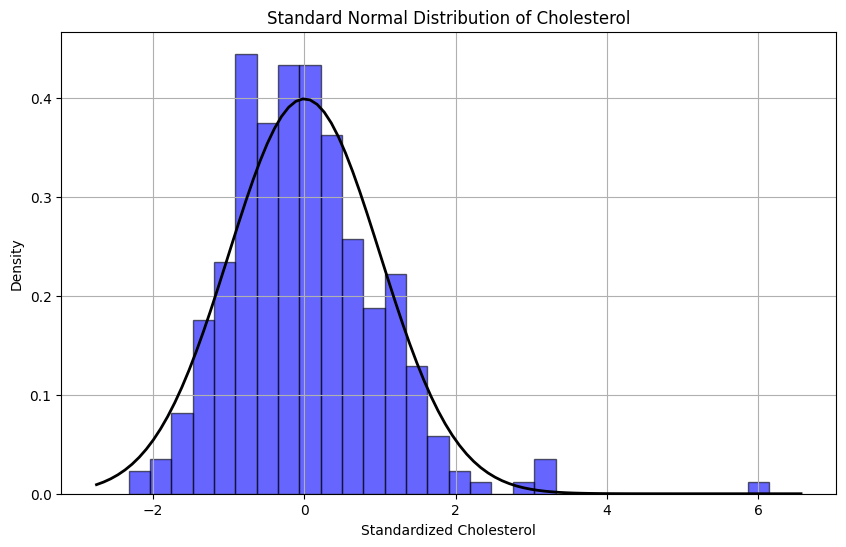

In [30]:
#standard normal distribution for cholesterol
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the 'chol' column
cholesterol = df['chol']

# Calculate mean and standard deviation
mean_chol = np.mean(cholesterol)
std_chol = np.std(cholesterol)

# Generate standard normal distribution for the cholesterol data
standard_normal_chol = (cholesterol - mean_chol) / std_chol

# Plot the standard normal distribution
plt.figure(figsize=(10, 6))
plt.hist(standard_normal_chol, bins=30, density=True, alpha=0.6,
color='b', edgecolor='black')

# Plot the standard normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Standard Normal Distribution of Cholesterol')
plt.xlabel('Standardized Cholesterol')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# **Standard normal distribution of age**

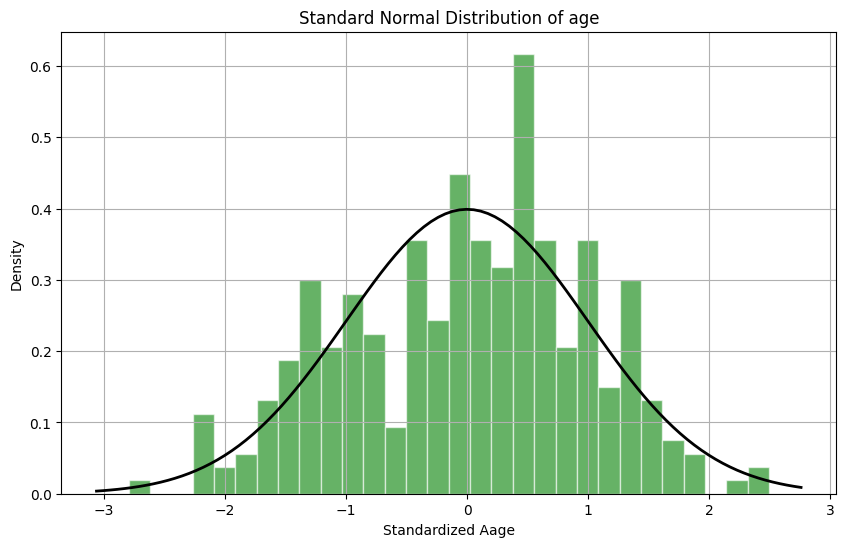

In [31]:
#standard normal distribution for age
# Extract the 'age' column
age = df['age']

# Calculate mean and standard deviation
mean_age = np.mean(age)
std_age = np.std(age)

# Generate standard normal distribution for the age data
standard_normal_age = (age - mean_age) / std_age

# Plot the standard normal distribution
plt.figure(figsize=(10, 6))
plt.hist(standard_normal_age, bins=30, density=True, alpha=0.6,
color='g', edgecolor='white')

# Plot the standard normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Standard Normal Distribution of age')
plt.xlabel('Standardized Aage')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# **Simple example**

In [32]:
import statistics
import numpy as np
import math

numbers = [57,64,63,76,69,65,69,60,71]
#numbers = [48,47,49,50,48,51,46,50,47,50]
#numbers = [21,24,26,32,45,52,56,59,62,73,75,83]
#numbers = [66,76,116,212,320,336,456,576,588,652,672]
print("Unsorted List : ", numbers)
count=len(numbers)
numbers.sort()
print("Sorted List : ", numbers)
print("Count : ", count)
mean=statistics.mean(numbers)
median = statistics.median(numbers)
mode = statistics.mode(numbers)
print("Mean : ", mean)
print("Median : ", median)
print("Mode : ", mode)

#Positions
q1=(count+1)/4
q11=math.floor(q1)
q12=math.ceil(q1)
q3=3*(count+1)/4
q31=math.floor(q3)
q32=math.ceil(q3)

#Quartile
x = np.quantile(numbers,.25)
print("Quartile1 : ", x, "Positions ", q11, "", q12)
13
y = np.quantile(numbers,.75)
print("Quartile3 : ", y, "Positions ", q31, "", q32)

#Percentile
x = np.percentile(numbers,25)
print("percentile25 : ", x)
y = np.percentile(numbers,75)
print("percentile75 : ", y)

std = statistics.stdev(numbers)
print("Standard Deviation : ",std)
print("Variance : ",std*std)

from scipy.stats import skew
# Calculate skewness
skewness = skew(numbers)

print("Skewness:", skewness)

Unsorted List :  [57, 64, 63, 76, 69, 65, 69, 60, 71]
Sorted List :  [57, 60, 63, 64, 65, 69, 69, 71, 76]
Count :  9
Mean :  66
Median :  65
Mode :  69
Quartile1 :  63.0 Positions  2  3
Quartile3 :  69.0 Positions  7  8
percentile25 :  63.0
percentile75 :  69.0
Standard Deviation :  5.852349955359813
Variance :  34.25
Skewness: 0.13096661439347634
